# Regression Explore Exercises

1.) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [39]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle

In [2]:
null_hypothesis = "Customer tenure is independent of total charges"
alternative_hypothesis = "Customer tenure and total charges is not independent"

In [3]:
df = wrangle.wrangle_telco()

In [4]:
df.head()

,monthly_charges,tenure,total_charges
customer_id,,,
0002-ORFBO,65.60,9,593.30
0020-JDNXP,61.25,34,1993.20
0022-TCJCI,62.70,45,2791.50
0068-FIGTF,78.20,27,2078.95
0074-HDKDG,61.60,25,1611.00


In [37]:
#exploring univariate

In [24]:
x = df.tenure
y= df.total_charges

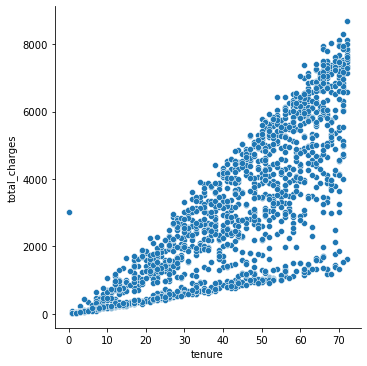

In [17]:
sns.relplot(x, y, kind = 'scatter') #I see an outlier for about 0 months with a total charge of ~3000?

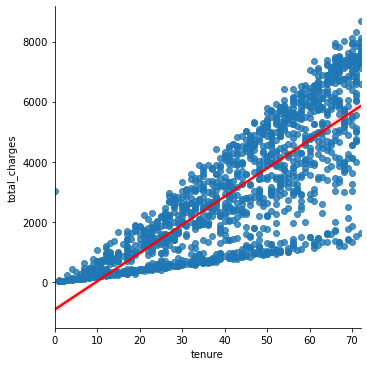

In [41]:
sns.lmplot(x="tenure", y="total_charges", data=df, line_kws={'color': 'red'})
plt.show()

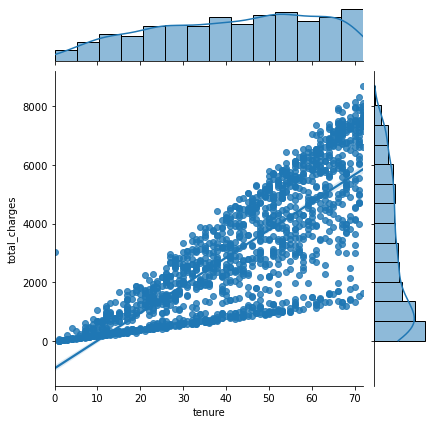

In [49]:
sns.jointplot(x="tenure", y="total_charges", data=df, kind='reg')
plt.show()

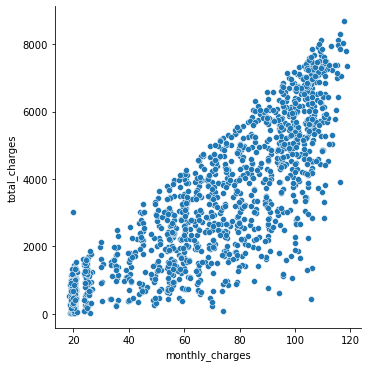

In [45]:
#exploring monthly_charges and total_charges (univariate)
#Outlier at about ~(20,3000)b
sns.relplot(x="monthly_charges", y="total_charges", data=df)
plt.show()

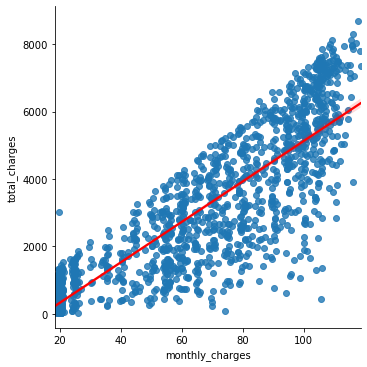

In [46]:
sns.lmplot(x="monthly_charges", y="total_charges", data=df, line_kws={'color': 'red'})
plt.show()

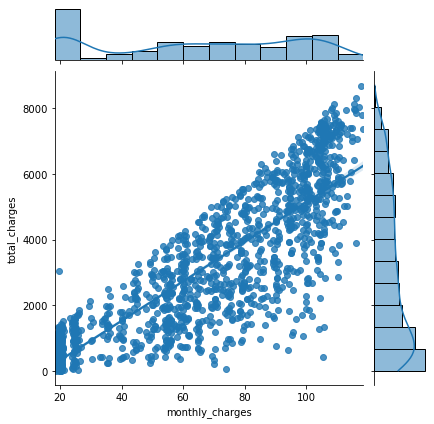

In [47]:
sns.jointplot(x="monthly_charges", y="total_charges", data=df, kind='reg')
plt.show()

Takeaways for Univariates:
 - As tenure increases, total charges increases. Sounds about right.
 - As monthly charges increases total charges increases.

<br>

### Explore with Split Data Sets

In [50]:
#bringing in split data
train, validate, test = wrangle.wrangle_split_telco()

In [51]:
#quality assurance
train.shape, validate.shape, test.shape

((824, 3), (354, 3), (295, 3))

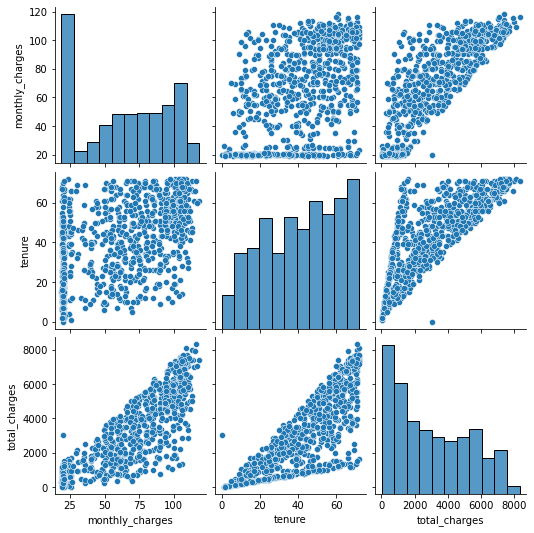

In [52]:
sns.pairplot(train)

<AxesSubplot:>

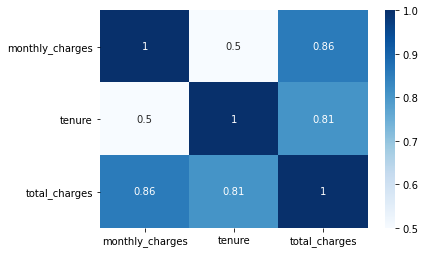

In [53]:
sns.heatmap(train.corr(), cmap='Blues', annot=True)

Takeaways for Bivariate Exploration:
 - Monthly charges and tenure and strong, positively correlated with total_charges
 - Tenure and monthly charges are +0.5 related, could be some relation